In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection
from sklearn import metrics
%matplotlib inline

## Prepare the Data

In [2]:
train_df = pd.read_csv('train.csv') #properties of the material
elements_df = pd.read_csv('unique_m.csv') #formulas and critical temperature

In [3]:
#in case we want to see the dataframes
train_df.columns
#elements_df

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [4]:
X = train_df.drop(columns=['critical_temp'])
y = train_df['critical_temp']

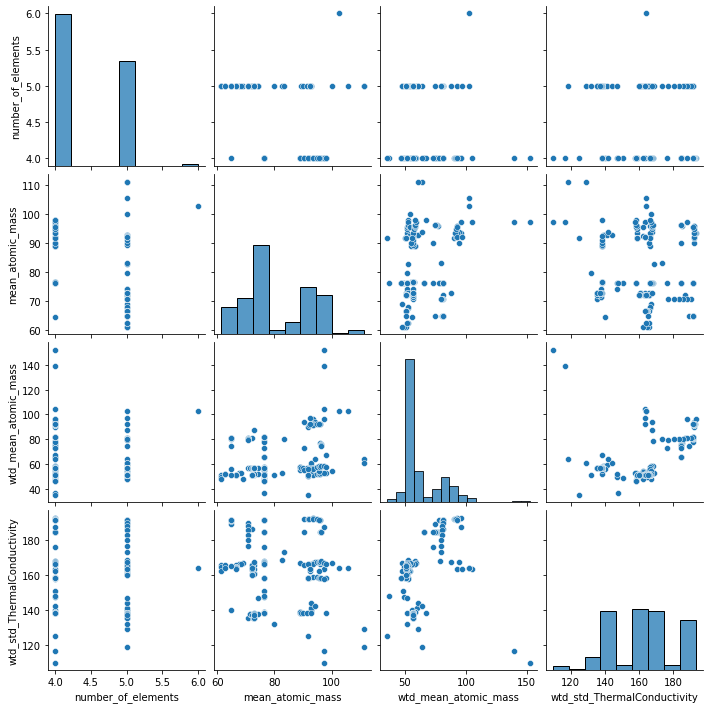

In [5]:
sns.pairplot(data=train_df.head(200),vars= ['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass','wtd_std_ThermalConductivity'])

In [6]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2, random_state = 4)

In [7]:
#now we normalize the data so its not biased
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Import some models

In [8]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import tree
from sklearn.linear_model import LinearRegression
models= [LinearRegression, tree.DecisionTreeRegressor, RandomForestRegressor, AdaBoostRegressor]

In [9]:
for model in models:
    train = model()
    train.fit(X_train,y_train)
    print(f"Accuracy for {train} is: {train.score(X_test,y_test)}")
    print('---------------------')

Accuracy for LinearRegression() is: 0.7293038243931591
---------------------
Accuracy for DecisionTreeRegressor() is: 0.8584275510943022
---------------------
Accuracy for RandomForestRegressor() is: 0.9127250629677011
---------------------
Accuracy for AdaBoostRegressor() is: 0.6754701293378733
---------------------


In [9]:
#y_pred = model.predict(X_test)
#df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#df_compare

## Reduce variables
We can search for highly correlated variables and reduce variables. Then we can run the most succesful algorithm to see if it runs faster and or we can get higher accuracy

In [10]:
cor_matrix = train_df.corr().abs()
#print(cor_matrix)

In [11]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#print(upper_tri)

<ipython-input-11-3351091d4494>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [12]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]#IF THE CORRELATION IS HIGHER THAN 0.9 WE CAN DROP THE COLUMNS
#print(); print(to_drop)

In [13]:
train_df_copy = train_df.copy(deep=True)
train_df_copy.drop(columns=to_drop,inplace=True)
print(); print(train_df_copy.head())


   number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   mean_fie  wtd_mean_fie  wtd_entropy_fie  range_fie  ...  \
0   775.425   1010.268571         0.791488      810.6  ...   
1   766.440   1010.612857         0.807078      810

In [14]:
X_clean = train_df_copy.drop(columns=['critical_temp'])
y_clean = train_df_copy['critical_temp']

In [15]:
#sns.pairplot(data=train_df_copy.head(200))

In [16]:
X_train_clean,X_test_clean,y_train_clean,y_test_clean = model_selection.train_test_split(X_clean,y_clean,test_size=0.2, random_state = 50)

## Final Test
After cleaning the data we can now test the RandomForestRegressor to see how fast it goes and the accuracy we get

In [17]:
RFR  =  RandomForestRegressor()
RFR.fit(X_train_clean,y_train_clean)

RandomForestRegressor()

In [18]:
print(f"Accuracy for RadomForestRegressor is: {RFR.score(X_test_clean,y_test_clean)}")

Accuracy for RadomForestRegressor is: 0.9229308998630563


## Test with neural network

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [39]:
RNN = Sequential()
#input layer
RNN.add(Dense(128, input_shape = (None,43), activation = 'relu' ))
#hidden layers
RNN.add(Dense(64, activation = 'relu' ))
RNN.add(Dense(64, activation = 'relu' ))
#RNN.add(Dense(64, activation = 'relu' ))
#RNN.add(Dense(64, activation = 'relu' ))
#RNN.add(Dense(64, activation = 'relu' ))
#we add now the output layer
RNN.add(Dense(1, activation = 'linear'))
RNN.compile(loss = 'mean_squared_error', optimizer= 'adam', metrics =['mae'])
RNN.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, None, 128)         5632      
                                                                 
 dense_28 (Dense)            (None, None, 64)          8256      
                                                                 
 dense_29 (Dense)            (None, None, 64)          4160      
                                                                 
 dense_30 (Dense)            (None, None, 1)           65        
                                                                 
Total params: 18,113
Trainable params: 18,113
Non-trainable params: 0
_________________________________________________________________


In [45]:
Training = RNN.fit(X_train_clean,y_train_clean, validation_split=0.2, epochs = 30)

Epoch 1/30
426/426 [==============================] - 1s 1ms/step - loss: 237.1393 - mae: 10.3036 - val_loss: 234.5620 - val_mae: 9.9462
Epoch 2/30
426/426 [==============================] - 1s 1ms/step - loss: 235.3195 - mae: 10.2391 - val_loss: 228.0640 - val_mae: 10.2660
Epoch 3/30
426/426 [==============================] - 0s 1ms/step - loss: 231.5497 - mae: 10.2078 - val_loss: 233.9204 - val_mae: 10.2260
Epoch 4/30
426/426 [==============================] - 0s 1ms/step - loss: 237.0902 - mae: 10.2850 - val_loss: 226.4250 - val_mae: 10.3615
Epoch 5/30
426/426 [==============================] - 0s 1ms/step - loss: 228.5131 - mae: 10.1086 - val_loss: 239.4647 - val_mae: 10.3288
Epoch 6/30
426/426 [==============================] - 0s 1ms/step - loss: 237.5332 - mae: 10.2747 - val_loss: 239.8318 - val_mae: 10.4104
Epoch 7/30
426/426 [==============================] - 0s 1ms/step - loss: 234.4040 - mae: 10.2388 - val_loss: 234.6040 - val_mae: 10.2707
Epoch 8/30
426/426 [===============

In [50]:
def plotloss():
    loss = Training.history['loss']
    val_loss = Training.history['val_loss']
    epochs = range(1, len(loss)+1)
    plt.plot(epochs,loss, 'y', label = 'Training loss')
    plt.plot(epochs,val_loss, 'y', label = 'Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    return plt.show()

In [51]:
def plotMAE():
    acc = Training.history['mae']
    val_acc = Training.history['val_mae']
    epochs = range(1, len(acc)+1)
    plt.plot(epochs,acc, 'y', label = 'Training loss')
    plt.plot(epochs,val_acc, 'r', label = 'Validation loss')
    plt.title('Training and Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    return plt.show()

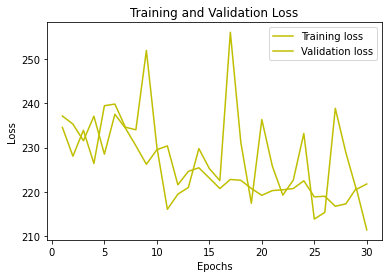

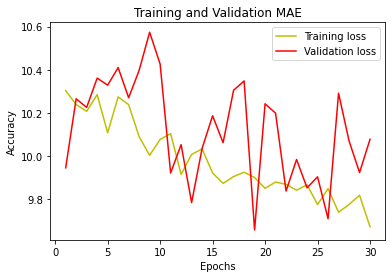

In [52]:
#plt.subplots(1,2)
plotloss()
plotMAE()

In [49]:
mse_neural, mae_neural = RNN.evaluate(X_test_clean,y_test)
print(mse_neural)
print(mae_neural)

133/133 [==============================] - 0s 641us/step - loss: 2060.0828 - mae: 35.1787
2060.082763671875
35.178688049316406


In [60]:
predictions = RNN.predict(X_test_clean[:5])
print('predicition: ', predictions)
print('real values:', y_test[:5])

predicition:  [[ 5.768201]
 [13.531462]
 [60.667484]
 [49.781326]
 [34.41936 ]]
real values: 14671    11.30
16698     8.00
799      89.66
12173    14.00
1524     15.00
Name: critical_temp, dtype: float64
